In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)


## Read the Data

In [2]:
Customer= pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA')
Customer.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [3]:
## Checking the shape of the data: Number of columns and rows

Customer.shape

(11260, 19)

In [4]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
#Treating cashback column
Customer[Customer.cashback=="$"]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
440,20440,0,0,1.0,16.0,Credit Card,Male,3.0,2,Regular Plus,3.0,Single,2,0.0,18,1,2,$,Mobile
1257,21257,0,4,1.0,9.0,Credit Card,Male,2.0,3,Regular +,5.0,Married,+,NaN,13,0,3,$,Computer


In [6]:
Customer.cashback= Customer.cashback.replace(to_replace = '$', value =np.nan)

In [7]:
#converting cashback to float variable
Customer['cashback']=Customer['cashback'].astype(str).astype(float)

In [8]:
#Treating Day_Since_CC_connect column
Customer[Customer.Day_Since_CC_connect=="$"]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1663,21663,0,0,1.0,11.0,Debit Card,Female,2.0,3,Regular Plus,4.0,Single,2,1.0,12,0,$,124.78,Mobile


In [9]:
Customer.Day_Since_CC_connect= Customer.Day_Since_CC_connect.replace(to_replace = '$', value =np.nan)

In [10]:
#converting cashback to float variable
Customer['Day_Since_CC_connect']=Customer['Day_Since_CC_connect'].astype(str).astype(float)

In [11]:
Customer.Login_device.value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [12]:
#Treating Login_devicecolumn
Customer.Login_device= Customer.Login_device.replace(to_replace = '&&&&', value =np.nan)

In [13]:
Customer.City_Tier.value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [14]:
# Converting City_Tier into Category 
Customer.City_Tier= Customer.City_Tier.replace(to_replace = '', value =np.nan)

In [15]:
Customer.Payment.value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [16]:
#Treating rev_per_month column
Customer[Customer.rev_per_month=="+"]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
19,20019,1,19,1.0,20.0,Debit Card,Female,3.0,3,Regular +,4.0,Divorced,+,NaN,18,1,3.0,149.63,Mobile
38,20038,0,30,1.0,30.0,Debit Card,Male,2.0,2,HNI,2.0,Married,+,NaN,16,1,4.0,194.39,Mobile
60,20060,0,6,1.0,20.0,Credit Card,Female,3.0,3,Regular +,4.0,Divorced,+,NaN,13,0,6.0,127.56,Mobile
65,20065,0,25,1.0,6.0,Debit Card,Male,3.0,4,Regular,3.0,Divorced,+,NaN,14,1,9.0,299.99,Mobile
88,20088,0,24,1.0,14.0,Debit Card,Male,2.0,@,HNI,4.0,Divorced,+,0.0,16,1,7.0,224.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,31194,0,16,1.0,37.0,Debit Card,Male,3.0,5,Super,3.0,Single,+,NaN,13,4,8.0,171.32,Computer
11197,31197,0,1,1.0,10.0,Debit Card,Male,3.0,@,Super,3.0,Single,+,0.0,15,2,3.0,175.17,NaN
11203,31203,0,1,1.0,13.0,UPI,Male,3.0,4,Regular +,3.0,Married,+,NaN,20,1,3.0,170.77,Mobile
11227,31227,0,13,1.0,20.0,Debit Card,Male,3.0,4,Regular,1.0,Single,+,NaN,15,2,4.0,325.31,Computer


In [17]:
Customer.rev_per_month= Customer.rev_per_month.replace(to_replace = '+', value =np.nan)

In [18]:
#converting rev_per_month to float variable
Customer['rev_per_month']=Customer['rev_per_month'].astype(str).astype(float)

In [19]:
#Treating Tenure column
Customer[Customer.Tenure=="#"]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
12,20012,1,#,1.0,11.0,Cash on Delivery,Male,2.0,3,Regular Plus,3.0,Single,2.0,1.0,13,2,2.0,134.41,Mobile
15,20015,1,#,2.0,12.0,UPI,Male,3.0,3,Regular Plus,5.0,Married,5.0,1.0,22,1,2.0,120.73,Mobile
575,20575,1,#,1.0,8.0,Cash on Delivery,Male,2.0,3,Regular Plus,3.0,Single,5.0,0.0,24,1,0.0,124.79,Mobile
754,20754,0,#,3.0,13.0,E wallet,Male,2.0,1,Super,2.0,Married,1.0,1.0,18,0,9.0,152.20,Mobile
979,20979,0,#,1.0,15.0,Debit Card,Male,3.0,1,Regular Plus,3.0,Married,7.0,0.0,18,1,0.0,124.51,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10998,30998,0,#,1.0,15.0,Credit Card,Male,3.0,5,Super,1.0,Married,5.0,0.0,17,1,14.0,169.86,Mobile
11057,31057,0,#,3.0,24.0,Debit Card,Male,3.0,4,Super,3.0,Married,7.0,1.0,16,2,8.0,170.01,Computer
11150,31150,0,#,1.0,18.0,Credit Card,Female,4.0,2,Regular Plus,3.0,Married,12.0,0.0,14,2,3.0,168.78,Mobile
11157,31157,0,#,1.0,12.0,Cash on Delivery,Male,3.0,4,Regular Plus,4.0,Married,3.0,0.0,13,1,3.0,152.26,Mobile


In [20]:
Customer.Tenure= Customer.Tenure.replace(to_replace = '#', value =np.nan)

In [21]:
#converting Tenure to float variable
Customer['Tenure']=Customer['Tenure'].astype(str).astype(float)

In [22]:
# Converting Service_Score into Category 
Customer.Service_Score= Customer.Service_Score.replace(to_replace = '', value =np.nan)


In [23]:
# Converting CC_Agent_Score into Category
Customer.CC_Agent_Score= Customer.CC_Agent_Score.replace(to_replace = '', value =np.nan)


In [24]:
#Treating Account_user_count column
Customer[Customer.Account_user_count=="@"]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
88,20088,0,24.0,1.0,14.0,Debit Card,Male,2.0,@,HNI,4.0,Divorced,NaN,0.0,16,1,7.0,224.90,NaN
110,20110,0,16.0,3.0,22.0,E wallet,Female,3.0,@,Super +,2.0,Divorced,NaN,1.0,22,0,9.0,260.64,NaN
170,20170,0,15.0,3.0,32.0,E wallet,Female,3.0,@,Super +,4.0,Divorced,NaN,0.0,14,2,8.0,235.25,NaN
216,20216,0,11.0,1.0,21.0,Debit Card,Male,3.0,@,HNI,2.0,Married,NaN,1.0,14,1,9.0,215.10,NaN
241,20241,1,4.0,3.0,10.0,E wallet,Male,2.0,@,Super,4.0,Single,NaN,0.0,18,7,7.0,193.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11109,31109,0,6.0,3.0,20.0,E wallet,Male,4.0,@,Super,1.0,Single,NaN,0.0,16,1,1.0,176.48,NaN
11155,31155,1,1.0,3.0,34.0,Cash on Delivery,Male,3.0,@,Regular +,5.0,Single,NaN,0.0,19,1,1.0,141.91,NaN
11159,31159,1,1.0,3.0,25.0,E wallet,Female,3.0,@,Super,3.0,Single,NaN,1.0,14,1,3.0,223.54,NaN
11168,31168,0,16.0,3.0,21.0,E wallet,Male,4.0,@,Super,1.0,Married,NaN,1.0,15,2,1.0,180.87,NaN


In [25]:
Customer.Account_user_count= Customer.Account_user_count.replace(to_replace = '@', value =np.nan)

In [26]:
#Treating rev_growth_yoy column
Customer[Customer.rev_growth_yoy=="$"]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
3127,23127,0,4.0,3.0,14.0,E wallet,Male,3.0,4.0,Regular Plus,4.0,Single,2.0,0.0,$,2,3.0,154.83,Mobile
5837,25837,0,27.0,1.0,29.0,Debit Card,Female,2.0,3.0,Super,3.0,Single,7.0,0.0,$,1,3.0,151.69,Computer
6329,26329,0,15.0,1.0,41.0,Credit Card,Male,2.0,5.0,Super,2.0,Single,5.0,0.0,$,1,0.0,145.72,Mobile


In [27]:
Customer.rev_growth_yoy= Customer.rev_growth_yoy.replace(to_replace = '$', value =np.nan)

In [28]:
#converting rev_growth_yoy to float variable
Customer['rev_growth_yoy']=Customer['rev_growth_yoy'].astype(str).astype(float)

In [29]:
#Treating coupon_used_for_payment column
Customer.coupon_used_for_payment= Customer.coupon_used_for_payment.replace(to_replace = '#', value =np.nan)
Customer.coupon_used_for_payment= Customer.coupon_used_for_payment.replace(to_replace = '$', value =np.nan)
Customer.coupon_used_for_payment= Customer.coupon_used_for_payment.replace(to_replace = '*', value =np.nan)

In [30]:
#converting coupon_used_for_payment to float variable
Customer['coupon_used_for_payment']=Customer['coupon_used_for_payment'].astype(str).astype(float)

In [31]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [32]:
### Examine missing values
Customer_na = Customer.isna().sum()
Customer_na[Customer_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

rev_per_month              791
Login_device               760
cashback                   473
Account_user_count         444
Day_Since_CC_connect       358
Complain_ly                357
Tenure                     218
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Service_Score               98
account_segment             97
rev_growth_yoy               3
coupon_used_for_payment      3
dtype: int64

### Checking summary for numerical variables

In [33]:
## Checking the summary
Customer.describe().round(2)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.00,11260.00,11042.00,11148.00,11158.00,11162.00,10816.00,11144.00,10469.00,10903.00,11257.00,11257.00,10902.00,10787.00
mean,25629.50,0.17,11.03,1.65,17.87,2.90,3.69,3.07,6.36,0.29,16.19,1.79,4.63,196.24
std,3250.63,0.37,12.88,0.92,8.85,0.73,1.02,1.38,11.91,0.45,3.76,1.97,3.70,178.66
min,20000.00,0.00,0.00,1.00,4.00,0.00,1.00,1.00,1.00,0.00,4.00,0.00,0.00,0.00
25%,22814.75,0.00,2.00,1.00,11.00,2.00,3.00,2.00,3.00,0.00,13.00,1.00,2.00,147.21
50%,25629.50,0.00,9.00,1.00,16.00,3.00,4.00,3.00,5.00,0.00,15.00,1.00,3.00,165.25
75%,28444.25,0.00,16.00,3.00,23.00,3.00,4.00,4.00,7.00,1.00,19.00,2.00,8.00,200.01
max,31259.00,1.00,99.00,3.00,132.00,5.00,6.00,5.00,140.00,1.00,28.00,16.00,47.00,1997.00


In [34]:
# Check for duplicate data

dups = Customer.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Customer[dups]

Number of duplicate rows = 0


,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


**Replacing NULL values in Numerical Columns using Median**

In [35]:
median1=Customer["Tenure"].median()
median2=Customer["CC_Contacted_LY"].median()
median3=Customer["Account_user_count"].median()
median4=Customer["rev_per_month"].median()
median5=Customer["rev_growth_yoy"].median()
median6=Customer["coupon_used_for_payment"].median()
median7=Customer["Day_Since_CC_connect"].median()
median8=Customer["cashback"].median()



Customer["Tenure"].replace(np.nan,median1,inplace=True)
Customer["CC_Contacted_LY"].replace(np.nan,median2,inplace=True)
Customer["Account_user_count"].replace(np.nan,median3,inplace=True)
Customer["rev_per_month"].replace(np.nan,median4,inplace=True)
Customer["rev_growth_yoy"].replace(np.nan,median5,inplace=True)
Customer["coupon_used_for_payment"].replace(np.nan,median6,inplace=True)
Customer["Day_Since_CC_connect"].replace(np.nan,median7,inplace=True)
Customer["cashback"].replace(np.nan,median8,inplace=True)


**Replacing NULL values in Categorical Columns using Mode**

In [36]:
mode1=Customer["Churn"].mode().values[0]
mode2=Customer["City_Tier"].mode().values[0]
mode3=Customer["Payment"].mode().values[0]
mode4=Customer["Gender"].mode().values[0]
mode5=Customer["Service_Score"].mode().values[0]
mode6=Customer['account_segment'].mode().values[0]
mode7=Customer["CC_Agent_Score"].mode().values[0]
mode8=Customer["Marital_Status"].mode().values[0]
mode9=Customer["Complain_ly"].mode().values[0]
mode10=Customer["Login_device"].mode().values[0]



Customer["Churn"]=Customer["Churn"].replace(np.nan,mode1)
Customer["City_Tier"]=Customer["City_Tier"].replace(np.nan,mode2)
Customer["Payment"]=Customer["Payment"].replace(np.nan,mode3)
Customer["Gender"]=Customer["Gender"].replace(np.nan,mode4)
Customer["Service_Score"]=Customer["Service_Score"].replace(np.nan,mode5)
Customer['account_segment']=Customer['account_segment'].replace(np.nan,mode6)
Customer["CC_Agent_Score"]=Customer["CC_Agent_Score"].replace(np.nan,mode7)
Customer["Marital_Status"]=Customer["Marital_Status"].replace(np.nan,mode8)
Customer["Complain_ly"]=Customer["Complain_ly"].replace(np.nan,mode9)
Customer["Login_device"]=Customer["Login_device"].replace(np.nan,mode10)
                                                               

In [37]:
# Check for missing value in any column
Customer.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [38]:
Customer.shape

(11260, 19)

### Univariate Analysis

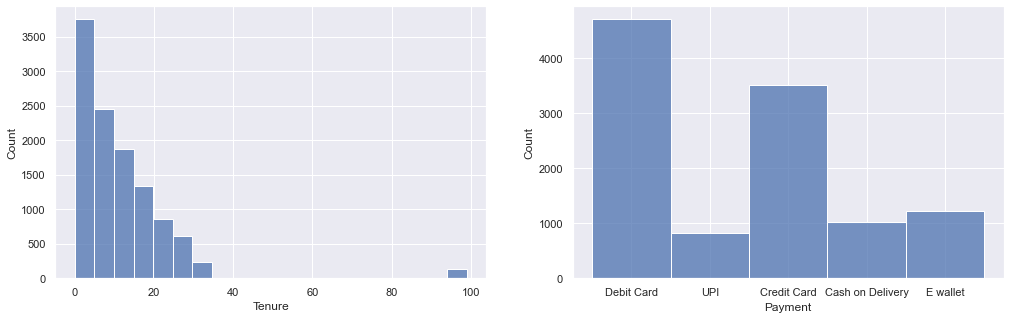

In [39]:
plt.figure(figsize =(17,5))

plt.subplot(1,2,1)
sns.histplot(Customer['Tenure'],bins=20)

plt.subplot(1,2,2)
sns.histplot(Customer['Payment'],bins=20);

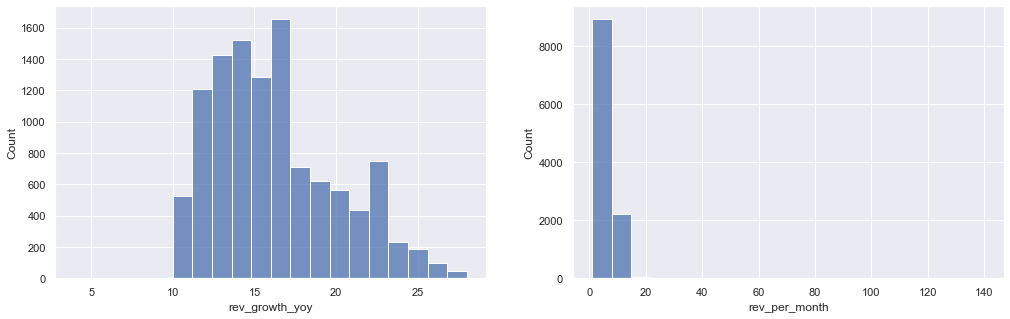

In [40]:
plt.figure(figsize =(17,5))

plt.subplot(1,2,1)
sns.histplot(Customer['rev_growth_yoy'],bins=20)

plt.subplot(1,2,2)
sns.histplot(Customer['rev_per_month'],bins=20);

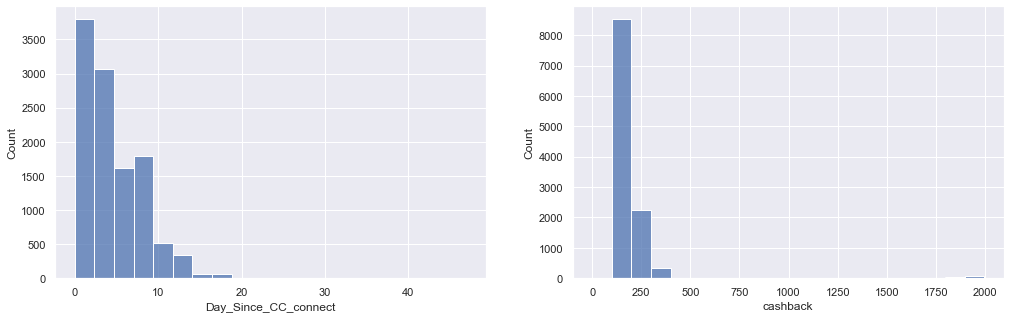

In [41]:
plt.figure(figsize =(17,5))

plt.subplot(1,2,1)
sns.histplot(Customer['Day_Since_CC_connect'],bins=20)

plt.subplot(1,2,2)
sns.histplot(Customer['cashback'],bins=20);

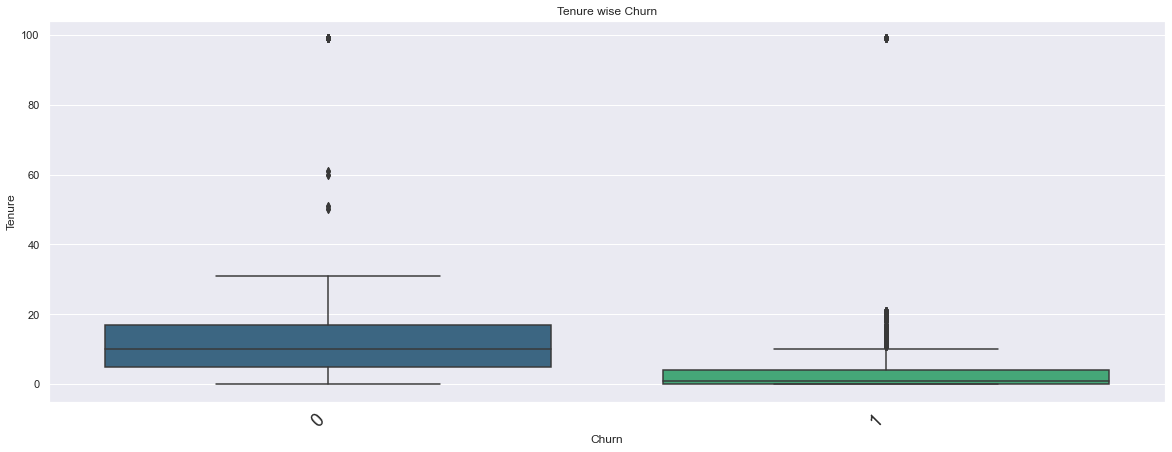

In [42]:
plt.figure(figsize=(20,7))

chart=sns.boxplot(x="Churn", y="Tenure", data=Customer, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Tenure wise Churn')
chart;

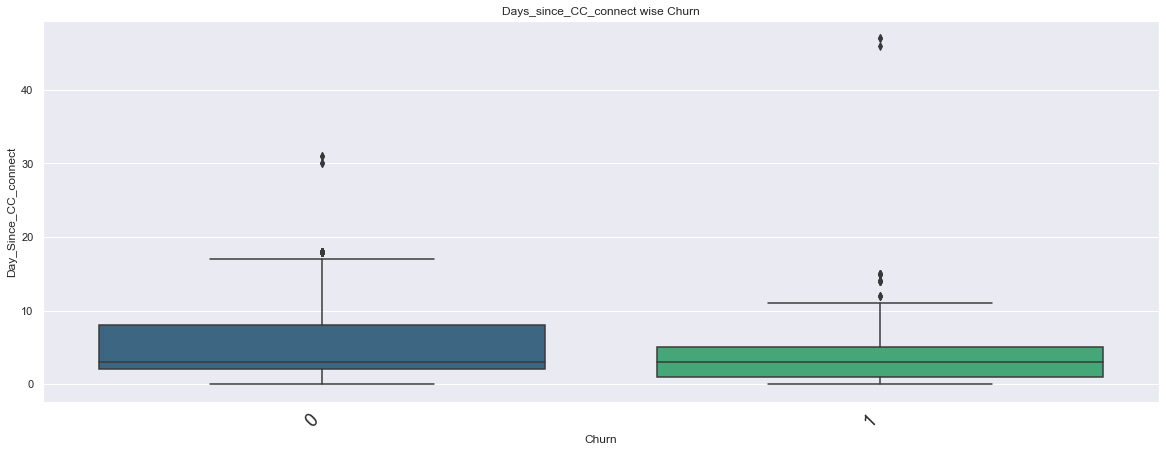

In [43]:
plt.figure(figsize=(20,7))

chart=sns.boxplot(x="Churn", y="Day_Since_CC_connect", data=Customer, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Days_since_CC_connect wise Churn')
chart;

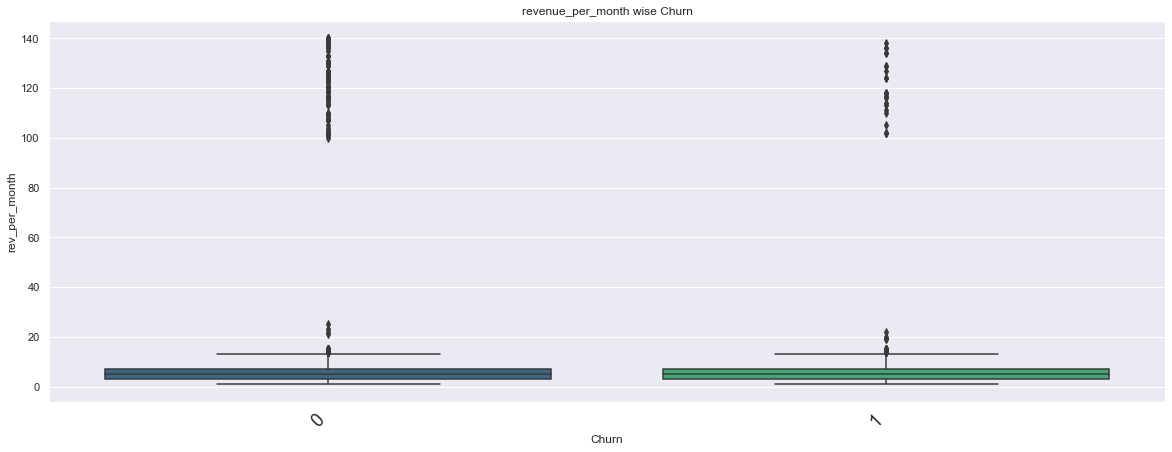

In [44]:
plt.figure(figsize=(20,7))

chart=sns.boxplot(x="Churn", y="rev_per_month", data=Customer, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('revenue_per_month wise Churn')
chart;

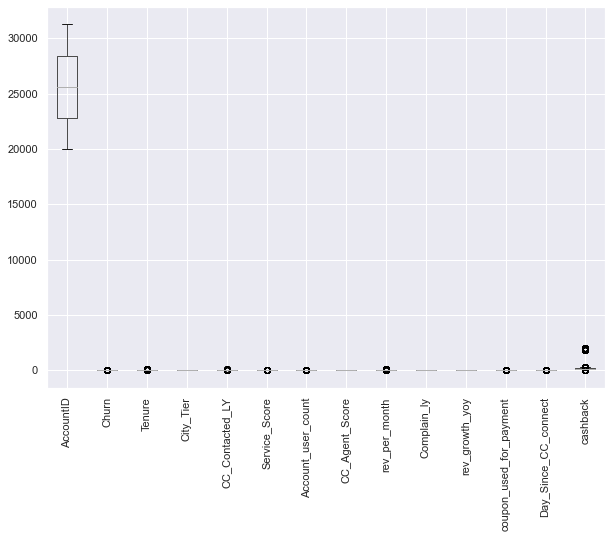

In [45]:
Customer.boxplot(figsize=(10,7), rot=90);

There are not too many outliers in our data. Therefore, we will move ahead without dropping outliers.

In [46]:
Customer['Gender'].replace('Male','M', inplace =True)
Customer['Gender'].replace('Female','F', inplace =True)

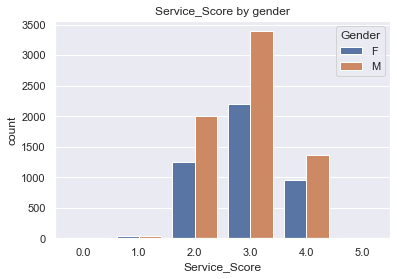

In [47]:
sns.countplot(Customer["Service_Score"],hue=Customer["Gender"]).set(title ='Service_Score by gender');

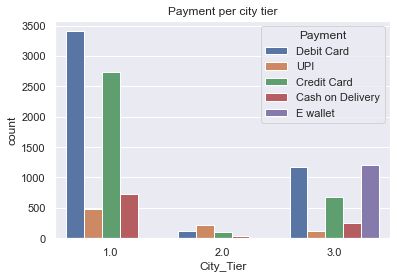

In [48]:
sns.countplot(Customer["City_Tier"],hue=Customer["Payment"]).set(title ='Payment per city tier');

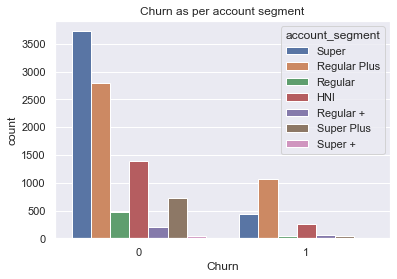

In [49]:
sns.countplot(Customer["Churn"],hue=Customer["account_segment"]).set(title ='Churn as per account segment');

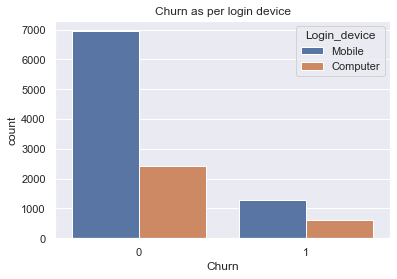

In [50]:
sns.countplot(Customer["Churn"],hue=Customer["Login_device"]).set(title ='Churn as per login device');

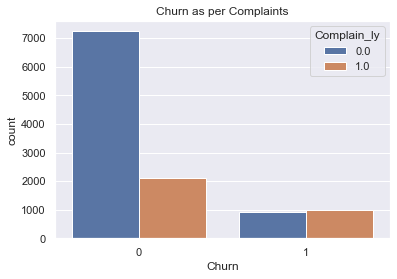

In [51]:
sns.countplot(Customer["Churn"],hue=Customer["Complain_ly"]).set(title ='Churn as per Complaints');

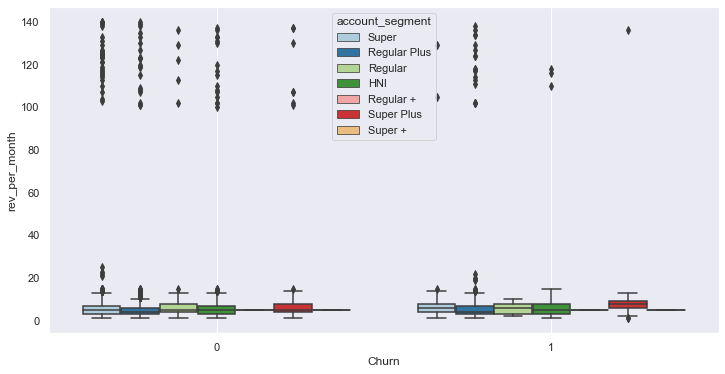

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Churn", y="rev_per_month", data=Customer ,hue='account_segment', palette= 'Paired')
plt.grid()
plt.show()

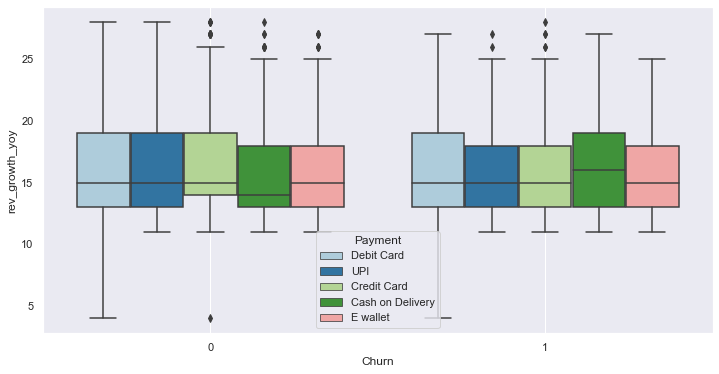

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Churn", y="rev_growth_yoy", data=Customer ,hue='Payment', palette= 'Paired')
plt.grid()
plt.show()

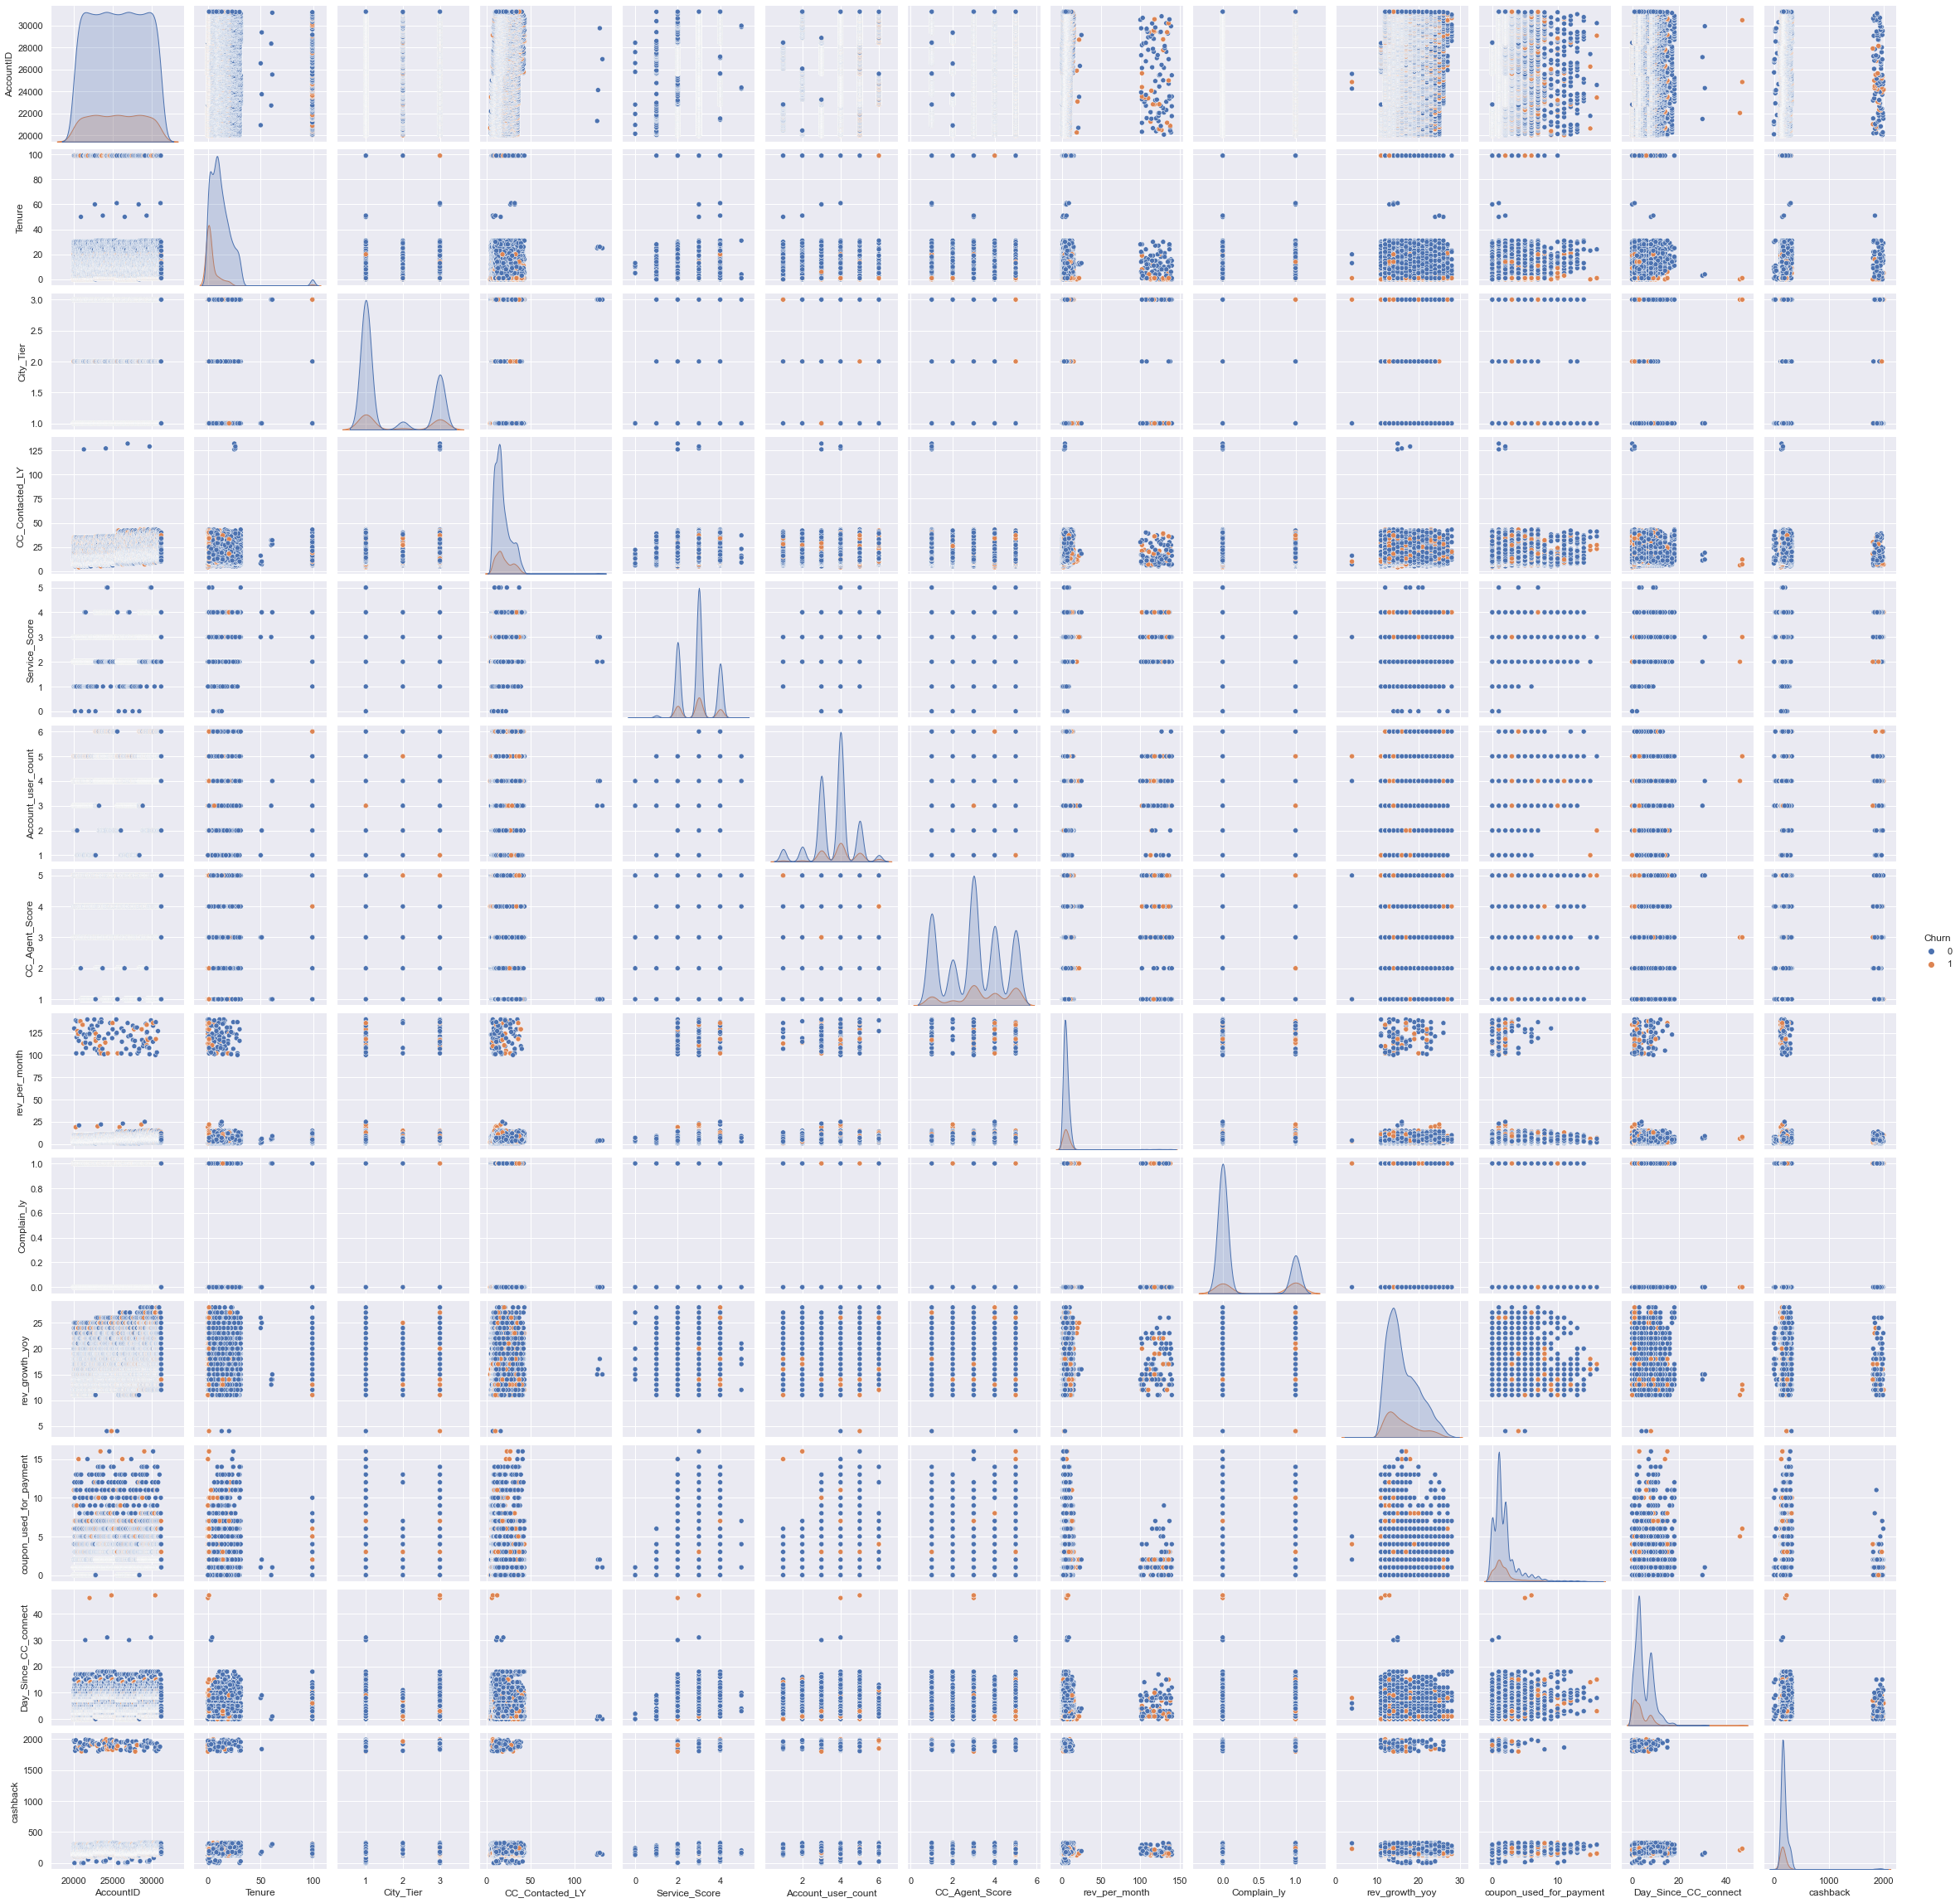

In [54]:
sns.pairplot(Customer, diag_kind='kde', hue='Churn')

In [55]:
corr = Customer.corr()
round(corr,2)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
AccountID,1.00,-0.01,0.01,0.00,0.25,0.30,0.20,-0.02,0.07,-0.00,0.17,0.11,0.06,0.03
Churn,-0.01,1.00,-0.23,0.08,0.07,0.01,0.10,0.11,0.02,0.25,-0.01,-0.01,-0.15,-0.03
Tenure,0.01,-0.23,1.00,-0.03,-0.00,0.01,-0.00,-0.02,0.03,-0.02,0.02,0.09,0.12,0.08
City_Tier,0.00,0.08,-0.03,1.00,0.01,-0.01,0.02,-0.01,-0.03,0.00,-0.03,0.02,0.02,0.01
CC_Contacted_LY,0.25,0.07,-0.00,0.01,1.00,0.06,0.02,-0.00,0.02,0.03,0.07,0.01,0.01,0.00
Service_Score,0.30,0.01,0.01,-0.01,0.06,1.00,0.32,0.03,0.03,0.00,0.10,0.18,0.10,0.04
Account_user_count,0.20,0.10,-0.00,0.02,0.02,0.32,1.00,-0.02,0.02,0.00,0.07,0.14,0.04,0.04
CC_Agent_Score,-0.02,0.11,-0.02,-0.01,-0.00,0.03,-0.02,1.00,0.02,-0.03,-0.03,0.03,0.03,-0.01
rev_per_month,0.07,0.02,0.03,-0.03,0.02,0.03,0.02,0.02,1.00,-0.00,0.02,0.02,0.00,0.00
Complain_ly,-0.00,0.25,-0.02,0.00,0.03,0.00,0.00,-0.03,-0.00,1.00,-0.00,-0.01,-0.04,0.01


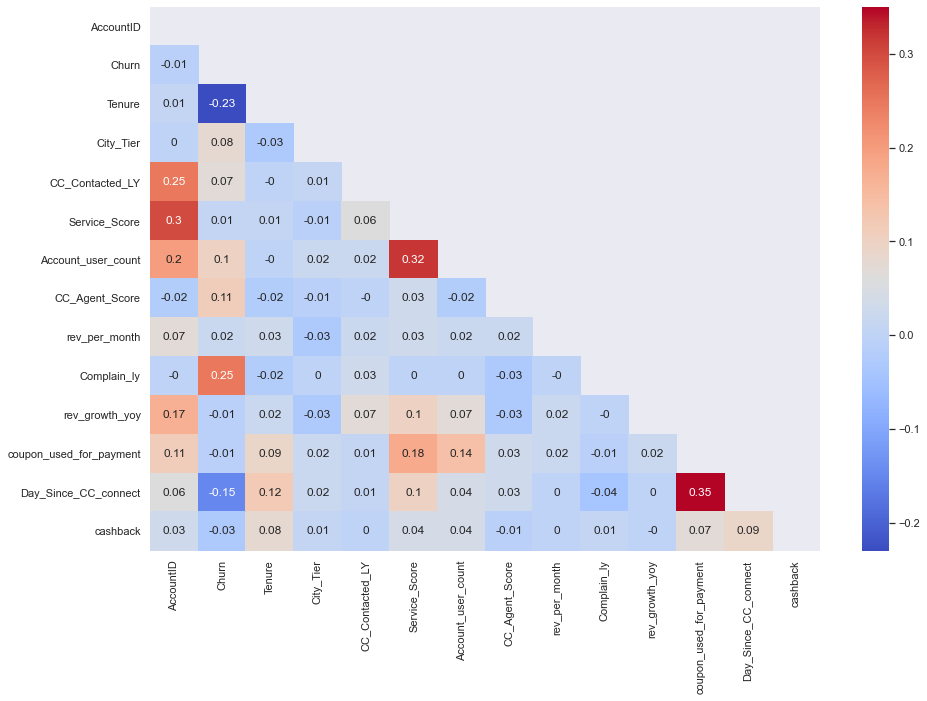

In [56]:
fig_dims = (15,10)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask, cmap ='coolwarm')

In [57]:
Customer.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

The data is imbalanced

In [58]:
cust=Customer.copy()

In [59]:
# Empty list to store columns with categorical data
categoricalColumns = []
for col, value in cust.iteritems():
    if value.dtype == 'object':
        categoricalColumns.append(col)

# Store the numerical columns in a list numerical
numericalColumns = cust.columns.difference(categoricalColumns)
print("Total number of numerical columns are:- ",len(numericalColumns))
print("Total number of categorical columns are:- ",len(categoricalColumns))

Total number of numerical columns are:-  14
Total number of categorical columns are:-  5


In [60]:
cust_catgorical = cust[categoricalColumns]
cust_catgorical = pd.get_dummies(cust_catgorical,drop_first=True)

cust_numerical = cust[numericalColumns]
cust_numerical = cust_numerical.drop(['AccountID'], axis=1) # Dropping AccountID
custdataset_final = pd.concat([cust_numerical, cust_catgorical], axis=1)
custdataset_final.head(3)

,Account_user_count,CC_Agent_Score,CC_Contacted_LY,Churn,City_Tier,Complain_ly,Day_Since_CC_connect,Service_Score,Tenure,cashback,...,Gender_M,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,3.0,2.0,6.0,1,3.0,1.0,5.0,3.0,4.0,159.93,...,0,0,0,0,1,0,0,0,1,1
1,4.0,3.0,8.0,1,1.0,1.0,0.0,3.0,0.0,120.90,...,1,0,0,1,0,0,0,0,1,1
2,4.0,3.0,30.0,1,1.0,1.0,3.0,2.0,0.0,165.25,...,1,0,0,1,0,0,0,0,1,1


In [61]:
custdataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account_user_count            11260 non-null  float64
 1   CC_Agent_Score                11260 non-null  float64
 2   CC_Contacted_LY               11260 non-null  float64
 3   Churn                         11260 non-null  int64  
 4   City_Tier                     11260 non-null  float64
 5   Complain_ly                   11260 non-null  float64
 6   Day_Since_CC_connect          11260 non-null  float64
 7   Service_Score                 11260 non-null  float64
 8   Tenure                        11260 non-null  float64
 9   cashback                      11260 non-null  float64
 10  coupon_used_for_payment       11260 non-null  float64
 11  rev_growth_yoy                11260 non-null  float64
 12  rev_per_month                 11260 non-null  float64
 13  P

#### Applying K Means clustering

In [62]:
from sklearn.cluster import KMeans

In [63]:
# Forming 2 clusters with K=2
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [64]:
# Fit K means on the dataframe
k_means.fit(custdataset_final)

KMeans(n_clusters=2, random_state=1)

In [65]:
# Cluster outpputs for all observations
# Get the labels
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
# Within Cluster Sum of Squares
k_means.inertia_

30904222.49692405

In [67]:
wss =[] 

In [68]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(custdataset_final)
    wss.append(KM.inertia_)

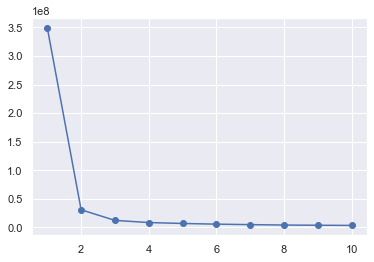

In [69]:
plt.plot(range(1,11), wss, 'o-');

### Calculating Silhouette Score

In [70]:
from sklearn.metrics import silhouette_score
ss={1:0}
for i in range(2, 10):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
 y=clusterer.fit_predict(custdataset_final)
 # The higher (up to 1) the better
 s =silhouette_score(custdataset_final, y )
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))


The Average Silhouette Score for 2 clusters is 0.96533
The Average Silhouette Score for 3 clusters is 0.61489
The Average Silhouette Score for 4 clusters is 0.45106
The Average Silhouette Score for 5 clusters is 0.35242
The Average Silhouette Score for 6 clusters is 0.36455
The Average Silhouette Score for 7 clusters is 0.37344
The Average Silhouette Score for 8 clusters is 0.34942
The Average Silhouette Score for 9 clusters is 0.30168


Highest silhouette score is for 2 clusters. So, final clusters will be 2

In [71]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(custdataset_final)
labels2 = k_means.labels_

In [72]:
labels2

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
Cust_df=custdataset_final

In [74]:
#Appending Clusters to the copy dataset
Cust_df["Clus_kmeans2"] = labels2
Cust_df.head()

,Account_user_count,CC_Agent_Score,CC_Contacted_LY,Churn,City_Tier,Complain_ly,Day_Since_CC_connect,Service_Score,Tenure,cashback,...,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile,Clus_kmeans2
0,3.0,2.0,6.0,1,3.0,1.0,5.0,3.0,4.0,159.93,...,0,0,0,1,0,0,0,1,1,0
1,4.0,3.0,8.0,1,1.0,1.0,0.0,3.0,0.0,120.90,...,0,0,1,0,0,0,0,1,1,0
2,4.0,3.0,30.0,1,1.0,1.0,3.0,2.0,0.0,165.25,...,0,0,1,0,0,0,0,1,1,0
3,4.0,5.0,15.0,1,3.0,0.0,3.0,2.0,0.0,134.07,...,0,0,0,1,0,0,0,1,1,0
4,3.0,5.0,12.0,1,1.0,0.0,3.0,2.0,0.0,129.60,...,0,0,1,0,0,0,0,1,1,0


In [75]:
Cust_df.Clus_kmeans2.value_counts().sort_index()

0    11152
1      108
Name: Clus_kmeans2, dtype: int64

In [76]:
clust_profile=Cust_df
clust_profile=clust_profile.groupby('Clus_kmeans2').mean()
clust_profile['freq']=Cust_df.Clus_kmeans2.value_counts().sort_index()
clust_profile

,Account_user_count,CC_Agent_Score,CC_Contacted_LY,Churn,City_Tier,Complain_ly,Day_Since_CC_connect,Service_Score,Tenure,cashback,...,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile,freq
Clus_kmeans2,,,,,,,,,,,,,,,,,,,,,
0,3.704986,3.067611,17.849713,0.168042,1.647866,0.275825,4.583931,2.903246,10.992557,178.385489,...,0.046180,0.023494,0.342719,0.369440,0.004214,0.068060,0.539186,0.312859,0.731169,11152
1,3.703704,2.879630,17.898148,0.203704,1.601852,0.324074,4.305556,2.916667,10.296296,1903.796296,...,0.046296,0.000000,0.370370,0.361111,0.000000,0.111111,0.546296,0.287037,0.814815,108


In [77]:
# drop the clusKmeans  column as it is useless for the model building
Cust_df = Cust_df.drop('Clus_kmeans2', axis=1)

### Train-Test Split

In [78]:
#Copy all the predictor variables into X dataframe
X = custdataset_final.drop(['Churn','Clus_kmeans2'], axis=1)

# Copy target into the y dataframe. 
y = custdataset_final['Churn']


In [79]:
from sklearn.model_selection import train_test_split
# Split the data into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [80]:
y_train.value_counts(1)

0    0.831642
1    0.168358
Name: Churn, dtype: float64

In [81]:
y_test.value_counts(1)

0    0.831557
1    0.168443
Name: Churn, dtype: float64

In [82]:
# we will use SMOTE technique to Balance out the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# After balancing the data Here is how the Balanced percentage of Data looks like
(y_train_res.value_counts()/len(y_train_res.index))*100

1    50.0
0    50.0
Name: Churn, dtype: float64

### Building Ensemble Random Forest Classifier

In [83]:
seed = 0   
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 1
}

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train_res, y_train_res)
rf_predictions = rf.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("="*80)
print(classification_report(y_test, rf_predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.6s


Accuracy score: 0.8658969804618117
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2809
           1       0.58      0.75      0.65       569

    accuracy                           0.87      3378
   macro avg       0.76      0.82      0.78      3378
weighted avg       0.88      0.87      0.87      3378



[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.7s finished


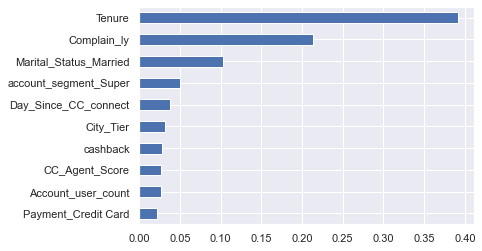

In [84]:
importances = rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [85]:
# Accuracy - Test Data
RF_test_Accuracy=rf.score(X_test, y_test)
RF_test_Accuracy

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished


0.8658969804618117

In [86]:
RF_metrics=classification_report(y_test, rf_predictions,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_test_precision=round(df.loc["1"][0],2)
RF_test_recall=round(df.loc["1"][1],2)
RF_test_f1=round(df.loc["1"][2],2)
print ('RF_test_precision ',RF_test_precision)
print ('RF_test_recall ',RF_test_recall)
print ('RF_test_f1 ',RF_test_f1)

RF_test_precision  0.58
RF_test_recall  0.75
RF_test_f1  0.65


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Area under Curve is 0.8877384455312793


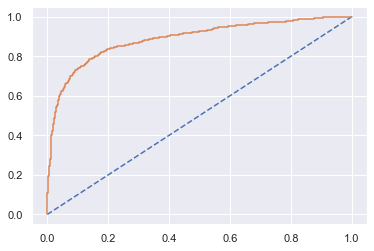

In [88]:
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_test_auc = roc_auc_score(y_test, probs)
print('Area under Curve is', RF_test_auc)
# calculate roc curve
RF_test_fpr, RF_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr, RF_test_tpr);

### Building Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
LRmodel = LogisticRegression()
LRmodel.fit(X_train_res, y_train_res)

LogisticRegression()

In [90]:
ytrain_predictLogit = LRmodel.predict(X_train_res)
ytest_predictLogit = LRmodel.predict(X_test)

In [91]:
# Accuracy - Training Data
LRmodel.score(X_train_res, y_train_res)

0.8301296720061022

In [92]:
print("Accuracy score: {}".format(accuracy_score(y_test, ytest_predictLogit)))
print("="*80)
print(classification_report(y_test, ytest_predictLogit))

Accuracy score: 0.7904085257548845
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      2809
           1       0.42      0.69      0.53       569

    accuracy                           0.79      3378
   macro avg       0.68      0.75      0.70      3378
weighted avg       0.84      0.79      0.81      3378



AxesSubplot(0.125,0.125;0.775x0.755)


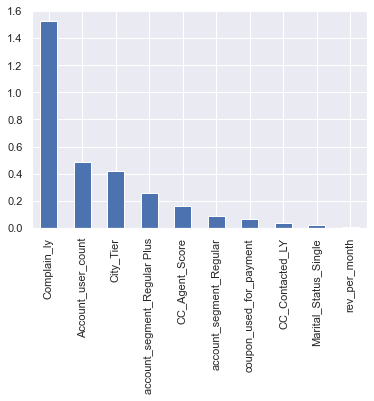

In [93]:
# To get the weights of all the variables
weights = pd.Series(LRmodel.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


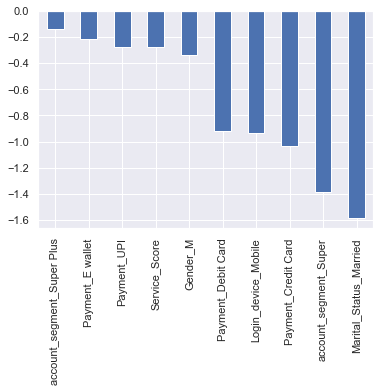

In [94]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### Applying GridSearchCV for Logistic Regression

In [96]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg','lbfgs', 'liblinear'],
      'tol':[0.0001,0.00001]}

In [97]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [98]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.

In [99]:
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [100]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear')


In [101]:
best_modelLogit = grid_search.best_estimator_

In [102]:
# Prediction on the training and test set

ytrain_predict = best_modelLogit.predict(X_train_res)
ytest_predict = best_modelLogit.predict(X_test)

In [103]:
## Getting the probabilities on the test set

ytest_predict_prob=best_modelLogit.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.926267,0.073733
1,0.862874,0.137126
2,0.543797,0.456203
3,0.922556,0.077444
4,0.155640,0.844360


In [104]:
# Accuracy - Training Data after applying GridSearch
LogReg_train__Accuracy=best_modelLogit.score(X_train_res, y_train_res)
LogReg_train__Accuracy

0.8462242562929062

In [105]:
print("Accuracy score: {}".format(accuracy_score(y_test, ytest_predict)))
print("="*80)
print(classification_report(y_test, ytest_predict))

Accuracy score: 0.8161634103019538
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2809
           1       0.47      0.63      0.54       569

    accuracy                           0.82      3378
   macro avg       0.69      0.74      0.71      3378
weighted avg       0.84      0.82      0.83      3378



In [106]:
# Accuracy - Test Data after applying GridSearch
LogReg_test__Accuracy=best_modelLogit.score(X_test, y_test)
LogReg_test__Accuracy

0.8161634103019538

In [107]:
Logreg_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(Logreg_metrics).transpose()
Logreg_test_precision=round(df.loc["1"][0],2)
Logreg_test_recall=round(df.loc["1"][1],2)
Logreg_test_f1=round(df.loc["1"][2],2)
print ('Logreg_test_precision ',Logreg_test_precision)
print ('Logreg_test_recall ',Logreg_test_recall)
print ('Logreg_test_f1 ',Logreg_test_f1)

Logreg_test_precision  0.47
Logreg_test_recall  0.63
Logreg_test_f1  0.54


Area under Curve is 0.8320706541426909


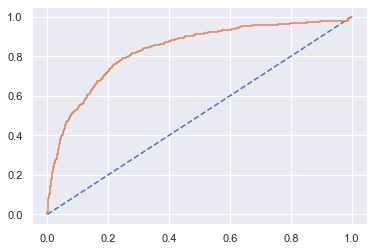

In [108]:
# predict probabilities
probs = best_modelLogit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logreg_test_auc = roc_auc_score(y_test, probs)
print('Area under Curve is', Logreg_test_auc)
# calculate roc curve
Logit_test_fpr, Logit_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logit_test_fpr, Logit_test_tpr);

### Building Ada Boost Model

In [109]:
from sklearn.ensemble import AdaBoostClassifier
Adamodel = AdaBoostClassifier(base_estimator=None,
    n_estimators=100,
    learning_rate=0.1,
    algorithm='SAMME.R',
    random_state=None)

In [110]:
Adamodel.fit(X_train_res,y_train_res)
preds = Adamodel.predict(X_test)

In [111]:
print("Accuracy score: {}".format(accuracy_score(y_test, preds)))
print("="*80)
print(classification_report(y_test, preds))

Accuracy score: 0.8552397868561279
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2809
           1       0.55      0.76      0.64       569

    accuracy                           0.86      3378
   macro avg       0.75      0.82      0.77      3378
weighted avg       0.88      0.86      0.86      3378



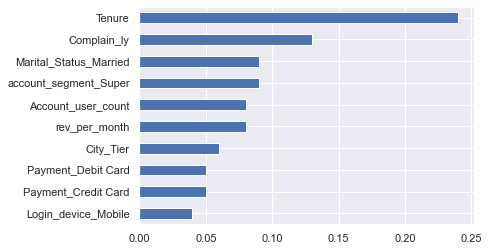

In [112]:
importances = Adamodel.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [113]:
# Accuracy - Test Data
Ada_test__Accuracy=Adamodel.score(X_test, y_test)
Ada_test__Accuracy

0.8552397868561279

In [114]:
Ada_metrics=classification_report(y_test, preds,output_dict=True)
df=pd.DataFrame(Ada_metrics).transpose()
Ada_test_precision=round(df.loc["1"][0],2)
Ada_test_recall=round(df.loc["1"][1],2)
Ada_test_f1=round(df.loc["1"][2],2)
print ('Ada_test_precision ',Ada_test_precision)
print ('Ada_test_recall ',Ada_test_recall)
print ('Ada_test_f1 ',Ada_test_f1)

Ada_test_precision  0.55
Ada_test_recall  0.76
Ada_test_f1  0.64


Area under Curve is 0.8856568861949508


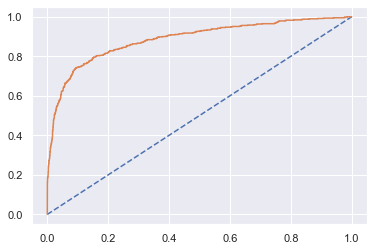

In [115]:
# predict probabilities
probs = Adamodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Ada_test_auc = roc_auc_score(y_test, probs)
print('Area under Curve is', Ada_test_auc)
# calculate roc curve
Ada_test_fpr, Ada_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Ada_test_fpr, Ada_test_tpr);

### Building  XG Boost Model

In [116]:
import xgboost
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7,
       n_estimators=100, n_jobs=1,
       objective='binary:logistic')

In [117]:
classifier.fit(X_train_res,y_train_res)
prediction=classifier.predict(X_test)

[13:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [118]:
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("="*80)
print(classification_report(y_test, prediction))

Accuracy score: 0.9378330373001776
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2809
           1       0.85      0.77      0.81       569

    accuracy                           0.94      3378
   macro avg       0.90      0.87      0.88      3378
weighted avg       0.94      0.94      0.94      3378



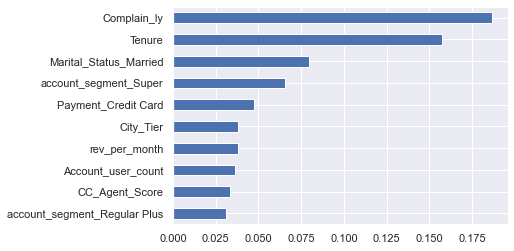

In [119]:
importances = classifier.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [120]:
# Accuracy - Test Data
XGB_test__Accuracy=accuracy_score(y_test, prediction)
XGB_test__Accuracy

0.9378330373001776

In [121]:
XGB_metrics=classification_report(y_test, prediction,output_dict=True)
df=pd.DataFrame(XGB_metrics).transpose()
XGB_test_precision=round(df.loc["1"][0],2)
XGB_test_recall=round(df.loc["1"][1],2)
XGB_test_f1=round(df.loc["1"][2],2)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_precision  0.85
XGB_test_recall  0.77
XGB_test_f1  0.81


Area under Curve is 0.9644358048226858


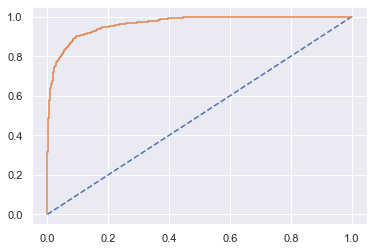

In [122]:
# predict probabilities
probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
XGB_test_auc = roc_auc_score(y_test, probs)
print('Area under Curve is', XGB_test_auc)
# calculate roc curve
XGB_test_fpr, XGB_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGB_test_fpr, XGB_test_tpr);

### Comparison of all models

In [123]:
index=['Accuracy', 'Recall','Precision','F1 Score','AUC']
data = pd.DataFrame({'Random Forest':[RF_test_Accuracy,RF_test_recall,RF_test_precision,RF_test_f1,RF_test_auc],
        'Logit Test':[LogReg_test__Accuracy,Logreg_test_recall,Logreg_test_precision,Logreg_test_f1,Logreg_test_auc],
       'Ada Boost test':[Ada_test__Accuracy,Ada_test_recall,Ada_test_precision,Ada_test_f1,Ada_test_auc],
        'XG Boost Test':[XGB_test__Accuracy,XGB_test_recall,XGB_test_precision,XGB_test_f1,XGB_test_auc]},index=index)
       
round(data,2)

,Random Forest,Logit Test,Ada Boost test,XG Boost Test
Accuracy,0.87,0.82,0.86,0.94
Recall,0.75,0.63,0.76,0.77
Precision,0.58,0.47,0.55,0.85
F1 Score,0.65,0.54,0.64,0.81
AUC,0.89,0.83,0.89,0.96


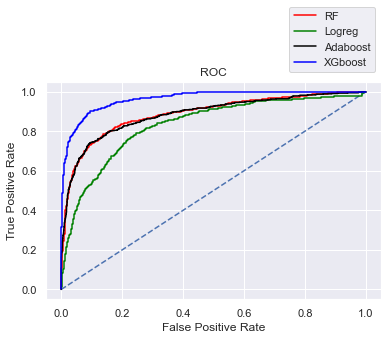

In [129]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(RF_test_fpr, RF_test_tpr,color='red',label="RF")
plt.plot(Logit_test_fpr,Logit_test_tpr,color='green',label="Logreg")
plt.plot(Ada_test_fpr,Ada_test_tpr,color='black',label="Adaboost")
plt.plot(XGB_test_fpr,XGB_test_tpr,color='blue',label="XGboost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### Does my model work?.. Can it predict?

In [124]:
custdataset_final.head(10)

,Account_user_count,CC_Agent_Score,CC_Contacted_LY,Churn,City_Tier,Complain_ly,Day_Since_CC_connect,Service_Score,Tenure,cashback,...,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile,Clus_kmeans2
0,3.0,2.0,6.0,1,3.0,1.0,5.0,3.0,4.0,159.93,...,0,0,0,1,0,0,0,1,1,0
1,4.0,3.0,8.0,1,1.0,1.0,0.0,3.0,0.0,120.90,...,0,0,1,0,0,0,0,1,1,0
2,4.0,3.0,30.0,1,1.0,1.0,3.0,2.0,0.0,165.25,...,0,0,1,0,0,0,0,1,1,0
3,4.0,5.0,15.0,1,3.0,0.0,3.0,2.0,0.0,134.07,...,0,0,0,1,0,0,0,1,1,0
4,3.0,5.0,12.0,1,1.0,0.0,3.0,2.0,0.0,129.60,...,0,0,1,0,0,0,0,1,1,0
5,4.0,5.0,22.0,1,1.0,1.0,7.0,3.0,0.0,139.19,...,0,0,1,0,0,0,0,1,0,0
6,3.0,2.0,11.0,1,3.0,0.0,0.0,2.0,2.0,120.86,...,0,0,0,1,0,0,0,0,1,0
7,3.0,2.0,6.0,1,1.0,1.0,0.0,3.0,0.0,122.93,...,0,0,1,0,0,0,0,0,1,0
8,4.0,3.0,9.0,1,3.0,1.0,2.0,2.0,13.0,126.83,...,0,0,1,0,0,0,0,0,1,0
9,5.0,3.0,31.0,1,1.0,0.0,1.0,2.0,0.0,122.93,...,0,0,1,0,0,0,0,1,1,0


In [125]:
m1 =custdataset_final[2:7]
m1

,Account_user_count,CC_Agent_Score,CC_Contacted_LY,Churn,City_Tier,Complain_ly,Day_Since_CC_connect,Service_Score,Tenure,cashback,...,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile,Clus_kmeans2
2,4.0,3.0,30.0,1,1.0,1.0,3.0,2.0,0.0,165.25,...,0,0,1,0,0,0,0,1,1,0
3,4.0,5.0,15.0,1,3.0,0.0,3.0,2.0,0.0,134.07,...,0,0,0,1,0,0,0,1,1,0
4,3.0,5.0,12.0,1,1.0,0.0,3.0,2.0,0.0,129.60,...,0,0,1,0,0,0,0,1,1,0
5,4.0,5.0,22.0,1,1.0,1.0,7.0,3.0,0.0,139.19,...,0,0,1,0,0,0,0,1,0,0
6,3.0,2.0,11.0,1,3.0,0.0,0.0,2.0,2.0,120.86,...,0,0,0,1,0,0,0,0,1,0


In [126]:
m2 =m1.drop('Churn', axis=1)
m3 = m1['Churn']

In [127]:
classifier.fit(m2,m3)
m4= classifier.predict(m2)
print(m4)

[13:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 1 1 1]
